In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [ ]:
# # 지수표현 제거
# pd.options.display.float_format = '{:.5f}'.format
# np.set_printoptions(precision=6, suppress=True)
# # ax.get_yaxis().get_major_formatter().set_scientific(False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/부동산_최종_데이터.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103076 entries, 0 to 1103075
Data columns (total 18 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   거래년도    1103076 non-null  int64  
 1   자치구명    1103076 non-null  object 
 2   법정동명    1103076 non-null  object 
 3   일반주소    1103076 non-null  object 
 4   상세주소    1103076 non-null  object 
 5   건물명     1103076 non-null  object 
 6   건물주용도   1103076 non-null  object 
 7   건축년도    1103076 non-null  int64  
 8   역세권여부   1103076 non-null  int64  
 9   주변역     1103076 non-null  object 
 10  층정보     1103076 non-null  int64  
 11  건물면적    1103076 non-null  float64
 12  규격      1103076 non-null  object 
 13  평수      1103076 non-null  int64  
 14  평단가     1103076 non-null  int64  
 15  위도      1103076 non-null  float64
 16  경도      1103076 non-null  float64
 17  거래가격    1103076 non-null  int64  
dtypes: float64(3), int64(7), object(8)
memory usage: 151.5+ MB


In [ ]:
# df = df.astype({ "거래년도" : object })

In [ ]:
df_SongPa = df[(df["자치구명"] == "송파구") & (df["거래년도"] > 2015)].reset_index( drop = True )
df_YongSan = df[(df["자치구명"] == "용산구") & (df["거래년도"] > 2015)].reset_index( drop = True )
df_GangNam = df[(df["자치구명"] == "강남구") & (df["거래년도"] > 2015)].reset_index( drop = True )
df_DoBong = df[(df["자치구명"] == "도봉구") & (df["거래년도"] > 2015)].reset_index( drop = True )
df_GuRo = df[(df["자치구명"] == "구로구") & (df["거래년도"] > 2015)].reset_index( drop = True )
df_YangCheon = df[(df["자치구명"] == "양천구") & (df["거래년도"] > 2015)].reset_index( drop = True )
df_MaPo = df[(df["자치구명"] == "마포구") & (df["거래년도"] > 2015)].reset_index( drop = True )
df_DongJak = df[(df["자치구명"] == "동작구") & (df["거래년도"] > 2015)].reset_index( drop = True )
df_DongDaeMoon = df[(df["자치구명"] == "동대문구") & (df["거래년도"] > 2015)].reset_index( drop = True )

In [ ]:
df_SongPa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41306 entries, 0 to 41305
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   거래년도    41306 non-null  int64  
 1   자치구명    41306 non-null  object 
 2   법정동명    41306 non-null  object 
 3   일반주소    41306 non-null  object 
 4   상세주소    41306 non-null  object 
 5   건물명     41306 non-null  object 
 6   건물주용도   41306 non-null  object 
 7   건축년도    41306 non-null  int64  
 8   역세권여부   41306 non-null  int64  
 9   주변역     41306 non-null  object 
 10  층정보     41306 non-null  int64  
 11  건물면적    41306 non-null  float64
 12  규격      41306 non-null  object 
 13  평수      41306 non-null  int64  
 14  평단가     41306 non-null  int64  
 15  위도      41306 non-null  float64
 16  경도      41306 non-null  float64
 17  거래가격    41306 non-null  int64  
dtypes: float64(3), int64(7), object(8)
memory usage: 5.7+ MB


In [ ]:
lst = [ df_SongPa, df_YongSan, df_GangNam, df_DoBong, df_GuRo, df_YangCheon]

In [ ]:
def Prdeict5Model( df, parameter ) :

  df_cat = df[[ '법정동명', '건물주용도']]
  X_cat = pd.get_dummies(df_cat)

  df_scaled = df[['층정보', '건축년도', '평수', '거래년도']]
  scaler = StandardScaler()

  x = scaler.fit_transform(df_scaled)
  X_scaled = pd.DataFrame(x, index=df_scaled.index, columns=df_scaled.columns)

  X_data = pd.concat([X_cat, X_scaled], axis=1)
  y_target = df['거래가격']

  X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=0)

  warnings.filterwarnings(action='ignore')

  dt_reg = DecisionTreeRegressor(random_state=10, max_depth=parameter[0])
  rf_reg = RandomForestRegressor(random_state=10, n_estimators=parameter[1])
  gb_reg = GradientBoostingRegressor(random_state=10, n_estimators=1000)
  xgb_reg = XGBRegressor(n_estimators=1000)
  lgb_reg = LGBMRegressor(n_estimators=parameter[2])

  start_time = time.time()

  dt_reg.fit(X_train, y_train)
  dt_pred = dt_reg.predict(X_test)

  rf_reg.fit(X_train, y_train)
  rf_pred = rf_reg.predict(X_test)

  gb_reg.fit(X_train, y_train)
  gb_pred = gb_reg.predict(X_test)

  xgb_reg.fit(X_train, y_train)
  xgb_pred = xgb_reg.predict(X_test)

  lgb_reg.fit(X_train, y_train)
  lgb_pred = lgb_reg.predict(X_test)

  print(' 실행시간 {0:.0f}초'.format(time.time() - start_time))

  print('##### ',dt_reg.__class__.__name__ , ' #####')
  print('MAE', mean_absolute_error(y_test, dt_pred))
  print('MSE', mean_squared_error(y_test, dt_pred))
  print('RMSE', sqrt(mean_squared_error(y_test, dt_pred)))
  print('R2', r2_score(y_test, dt_pred))

  print("")


  print('##### ',rf_reg.__class__.__name__ , ' #####')
  print('MAE', mean_absolute_error(y_test, rf_pred))
  print('MSE', mean_squared_error(y_test, rf_pred))
  print('RMSE', sqrt(mean_squared_error(y_test, rf_pred)))
  print('R2', r2_score(y_test, rf_pred))

  print("")


  print('##### ',gb_reg.__class__.__name__ , ' #####')
  print('MAE', mean_absolute_error(y_test, gb_pred))
  print('MSE', mean_squared_error(y_test, gb_pred))
  print('RMSE', sqrt(mean_squared_error(y_test, gb_pred)))
  print('R2', r2_score(y_test, gb_pred))

  print("")


  print('##### ',xgb_reg.__class__.__name__ , ' #####')
  print('MAE', mean_absolute_error(y_test, xgb_pred))
  print('MSE', mean_squared_error(y_test, xgb_pred))
  print('RMSE', sqrt(mean_squared_error(y_test, xgb_pred)))
  print('R2', r2_score(y_test, xgb_pred))

  print("")


  print('##### ',lgb_reg.__class__.__name__ , ' #####')
  print('MAE', mean_absolute_error(y_test, lgb_pred))
  print('MSE', mean_squared_error(y_test, lgb_pred))
  print('RMSE', sqrt(mean_squared_error(y_test, lgb_pred)))
  print('R2', r2_score(y_test, lgb_pred))



In [ ]:
lst2 = [[700, 1000, 1000], [400, 700, 1000], [100, 700, 1000], [10, 1000, 700],
        [200, 700, 1000], [10, 700, 700]]

In [ ]:
def Importance( df, parameter ) :
  df_cat = df[['법정동명', '건물주용도', '역세권여부']]
  X_cat = pd.get_dummies(df_cat)

  df_scaled = df[['층정보', '건축년도', '평수', '거래년도' ]]
  scaler = StandardScaler()

  x = scaler.fit_transform(df_scaled)
  X_scaled = pd.DataFrame(x, index=df_scaled.index, columns=df_scaled.columns)

  X_data = pd.concat([X_cat, X_scaled], axis=1)
  y_target = df['거래가격']

  X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=0)

  warnings.filterwarnings(action='ignore')

  dt_reg = DecisionTreeRegressor(random_state=10, max_depth=parameter[0])
  rf_reg = RandomForestRegressor(random_state=10, n_estimators=parameter[1])
  gb_reg = GradientBoostingRegressor(random_state=10, n_estimators=1000)
  xgb_reg = XGBRegressor(n_estimators=1000)
  lgb_reg = LGBMRegressor(n_estimators=parameter[2])

  start_time = time.time()

  dt_reg.fit(X_train, y_train)
  dt_pred = dt_reg.predict(X_test)

  rf_reg.fit(X_train, y_train)
  rf_pred = rf_reg.predict(X_test)

  gb_reg.fit(X_train, y_train)
  gb_pred = gb_reg.predict(X_test)

  xgb_reg.fit(X_train, y_train)
  xgb_pred = xgb_reg.predict(X_test)

  lgb_reg.fit(X_train, y_train)
  lgb_pred = lgb_reg.predict(X_test)

  dt_importances_values = dt_reg.feature_importances_
  dt_importances = pd.Series(dt_importances_values,index=X_data.columns[ : ])
  dt_top = dt_importances.sort_values(ascending=False)[ : 10]

  plt.figure(figsize=(10,12))
  plt.title('DT Feature importances')
  sns.barplot(x=dt_top , y = dt_top.index)
  plt.show()

  rf_importances_values = rf_reg.feature_importances_
  rf_importances = pd.Series(rf_importances_values,index=X_data.columns[ : ])
  rf_top = rf_importances.sort_values(ascending=False)[ : 10]

  plt.figure(figsize=(10,12))
  plt.title('RF Feature importances')
  sns.barplot(x=rf_top , y = rf_top.index)
  plt.show()

  gb_importances_values = gb_reg.feature_importances_
  gb_importances = pd.Series(gb_importances_values,index=X_data.columns[ : ])
  gb_top = gb_importances.sort_values(ascending=False)[ : 10]

  plt.figure(figsize=(10,12))
  plt.title('GB Feature importances')
  sns.barplot(x=gb_top , y = gb_top.index)
  plt.show()

  xgb_importances_values = xgb_reg.feature_importances_
  xgb_importances = pd.Series(xgb_importances_values,index=X_data.columns[ : ])
  xgb_top = xgb_importances.sort_values(ascending=False)[ : 10]

  plt.figure(figsize=(10,12))
  plt.title('XGB Feature importances')
  sns.barplot(x=xgb_top , y = xgb_top.index)
  plt.show()

  lgb_importances_values = lgb_reg.feature_importances_
  lgb_importances = pd.Series(lgb_importances_values,index=X_data.columns[ : ])
  lgb_top = lgb_importances.sort_values(ascending=False)[ : 10]

  plt.figure(figsize=(10,12))
  plt.title('LGB Feature importances')
  sns.barplot(x=lgb_top , y = lgb_top.index)
  plt.show()

In [ ]:
for i, j in zip( lst, lst2 ) :
    Prdeict5Model( i, j )

[05:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 실행시간 114초
#####  DecisionTreeRegressor  #####
MAE 70598892.62951976
MSE 1.3013700391143724e+16
RMSE 114077606.87857948
R2 0.9503019390207446

#####  RandomForestRegressor  #####
MAE 61874394.90496444
MSE 9253431139017512.0
RMSE 96194756.29688716
R2 0.9646620429860828

#####  GradientBoostingRegressor  #####
MAE 67930969.28800856
MSE 9615816919851650.0
RMSE 98060271.87322932
R2 0.9632781267983269

#####  XGBRegressor  #####
MAE 67856885.42811894
MSE 9682784153929236.0
RMSE 98401138.98695093
R2 0.9630223854194133

#####  LGBMRegressor  #####
MAE 58322947.36995571
MSE 7390425286065676.0
RMSE 85967582.76272328
R2 0.9717766818437378
[05:03:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 실행시간 41초
#####  DecisionTreeRegressor  #####
MAE 101348373.30826178
MSE 3.875895202879245e+16
RMSE 196872933

[06:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


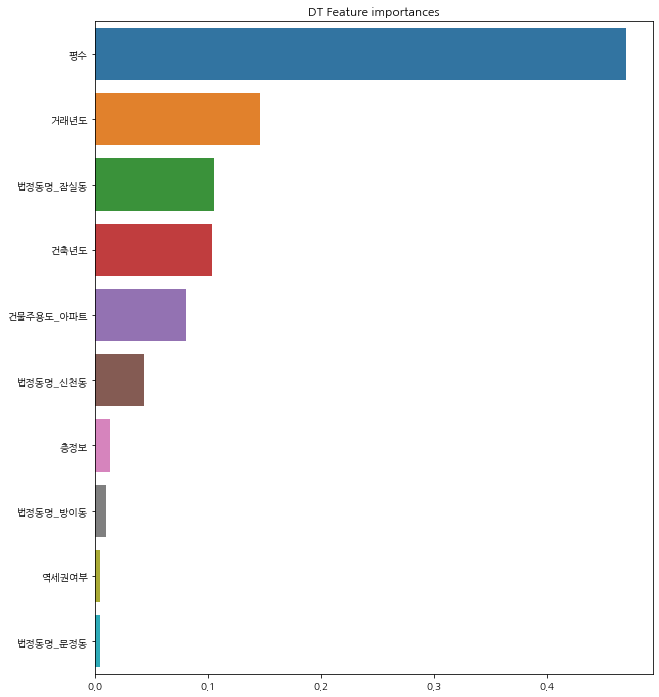

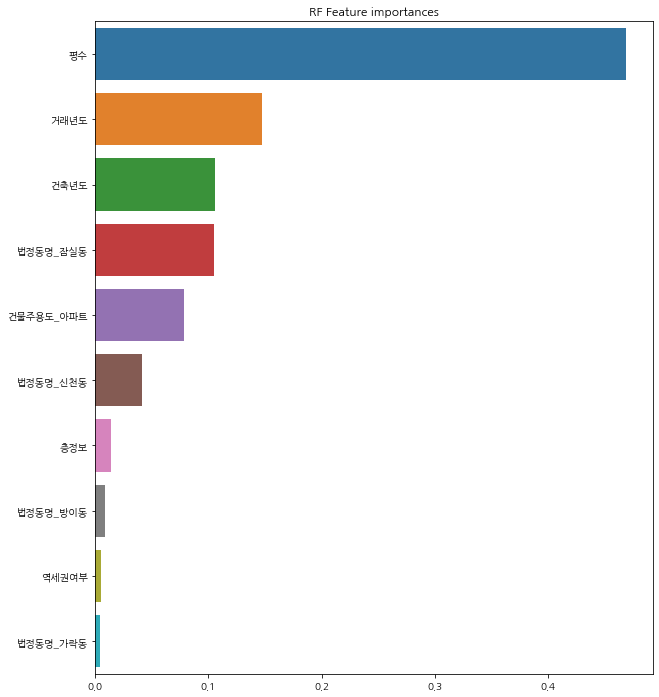

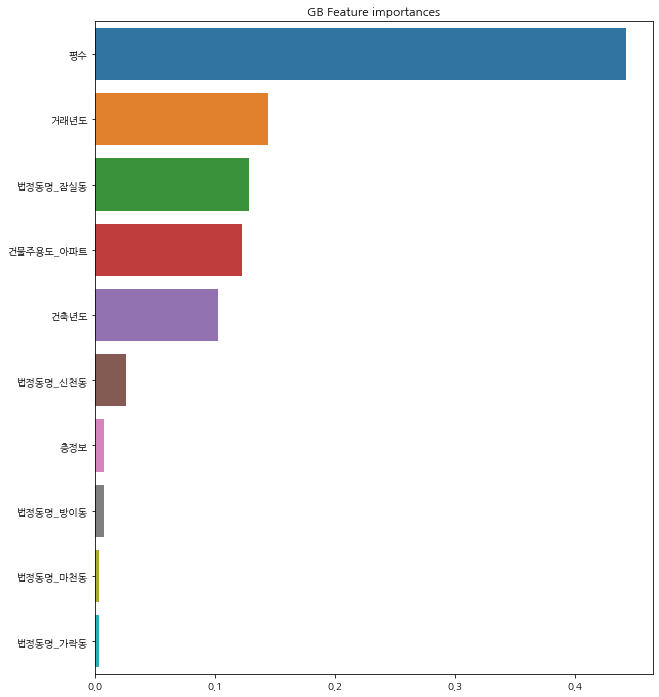

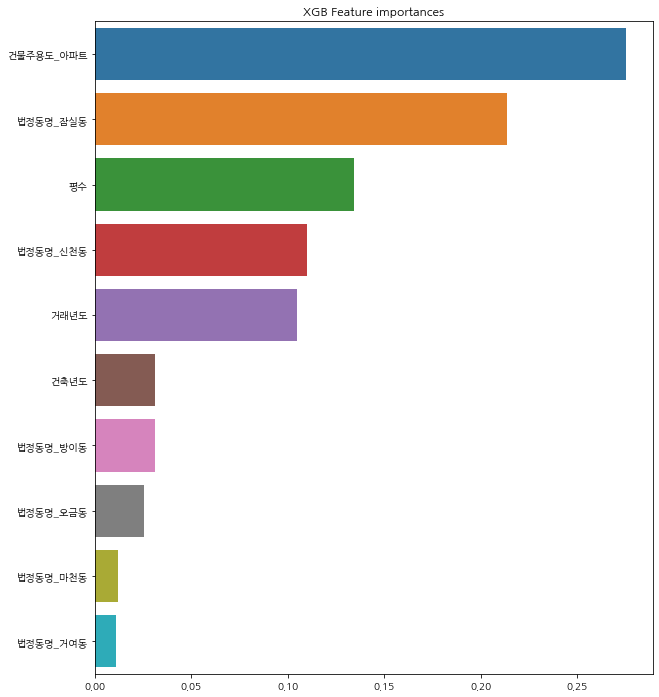

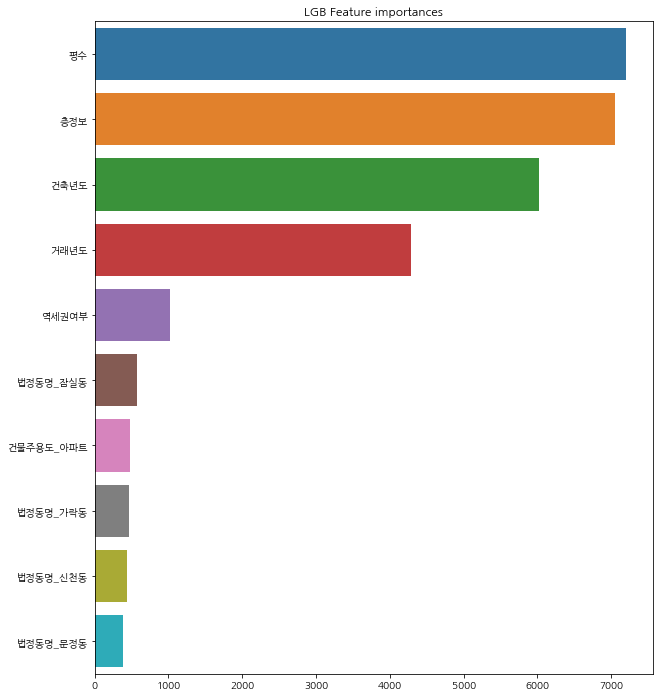

[06:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


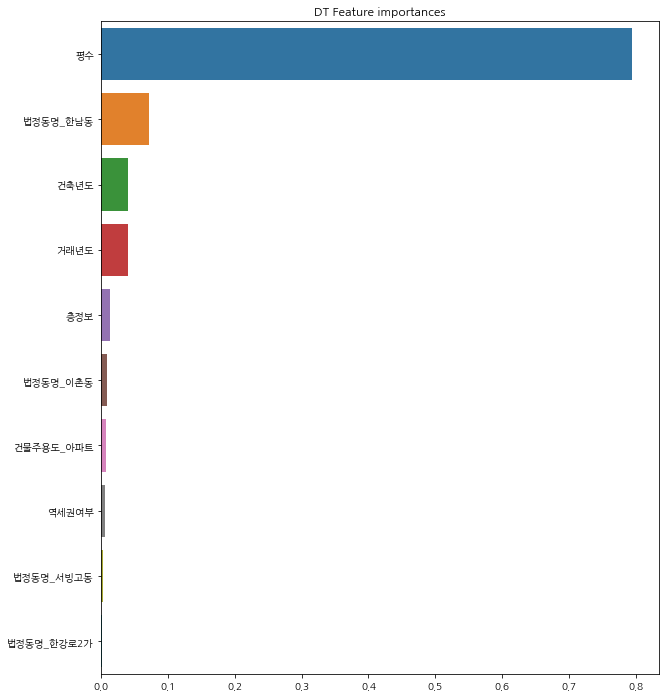

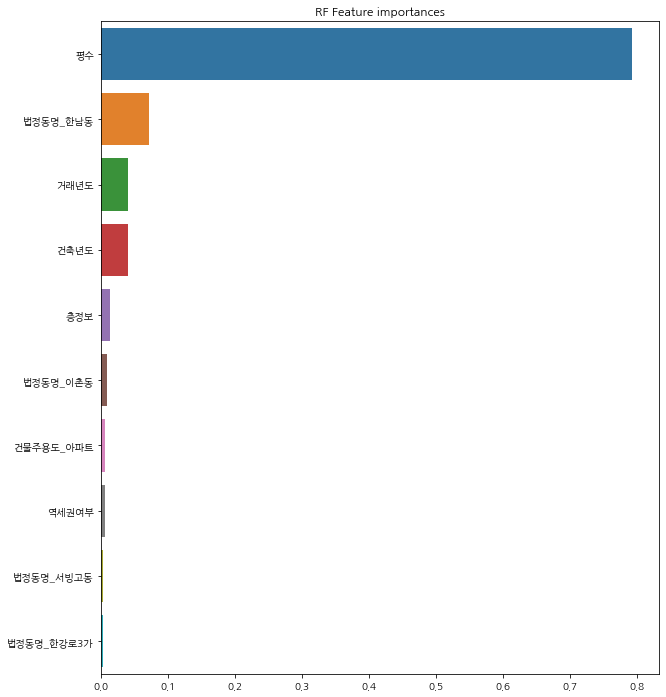

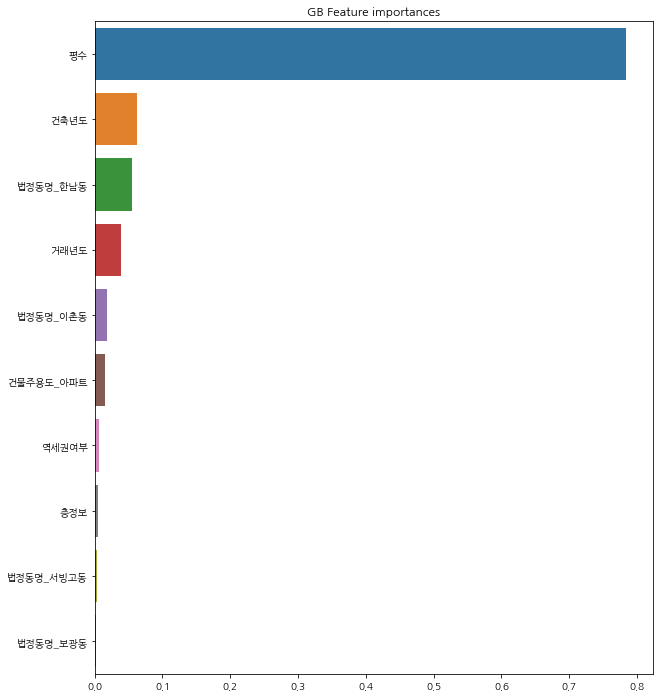

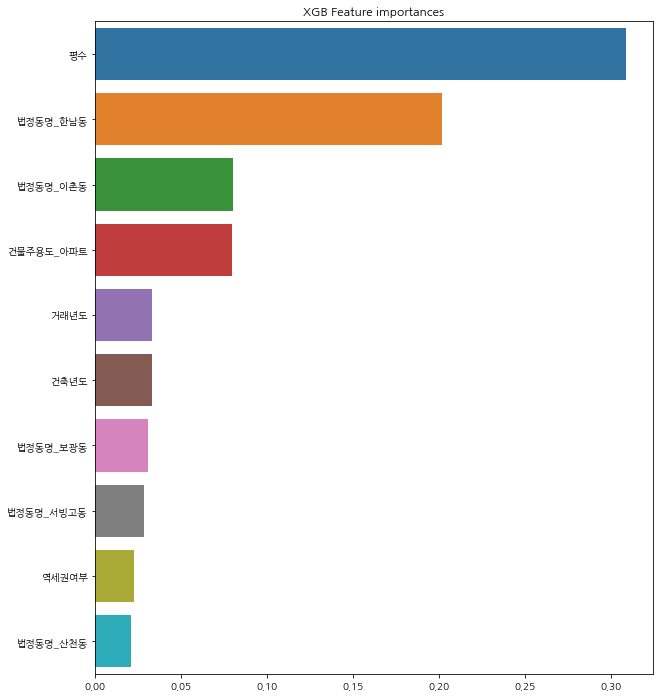

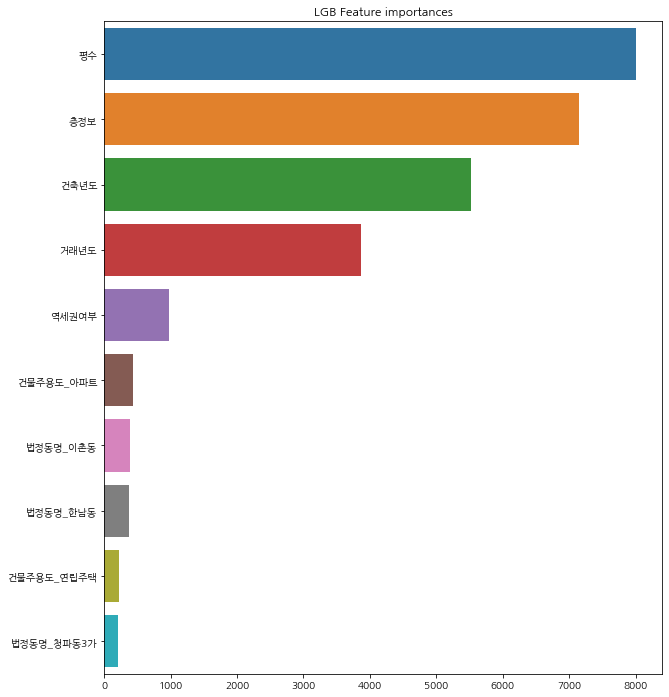

[06:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


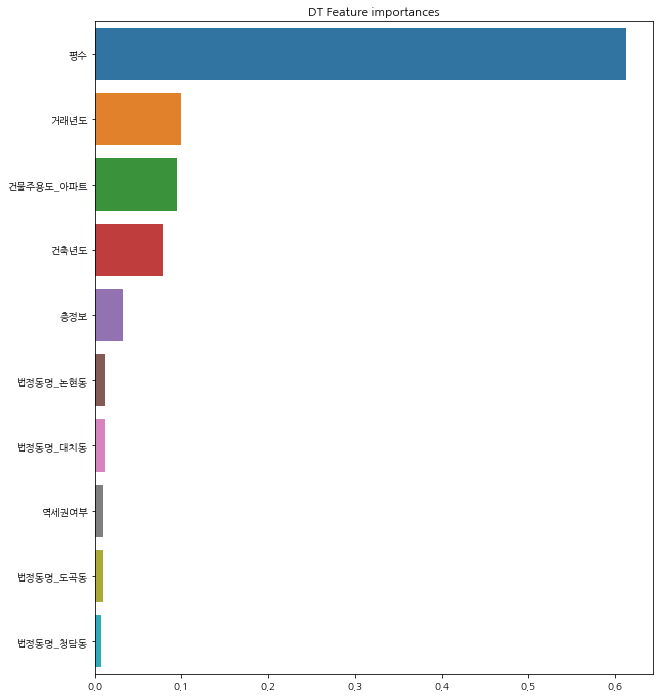

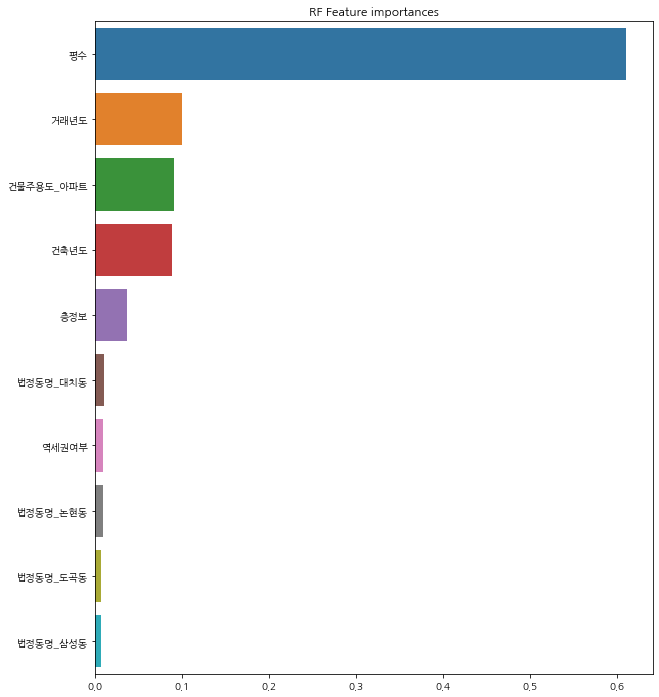

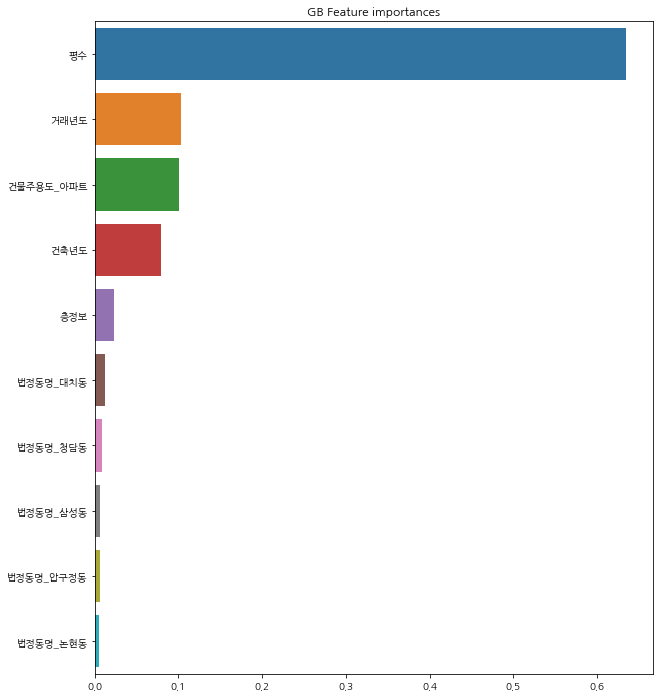

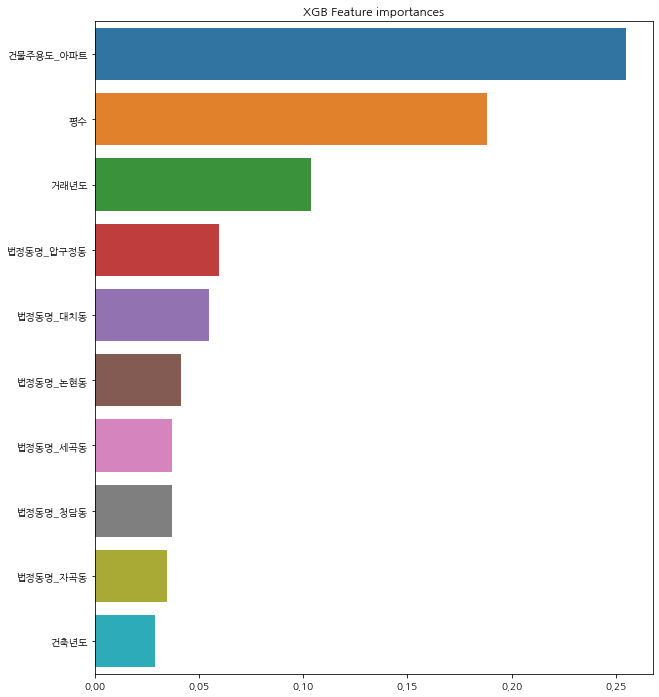

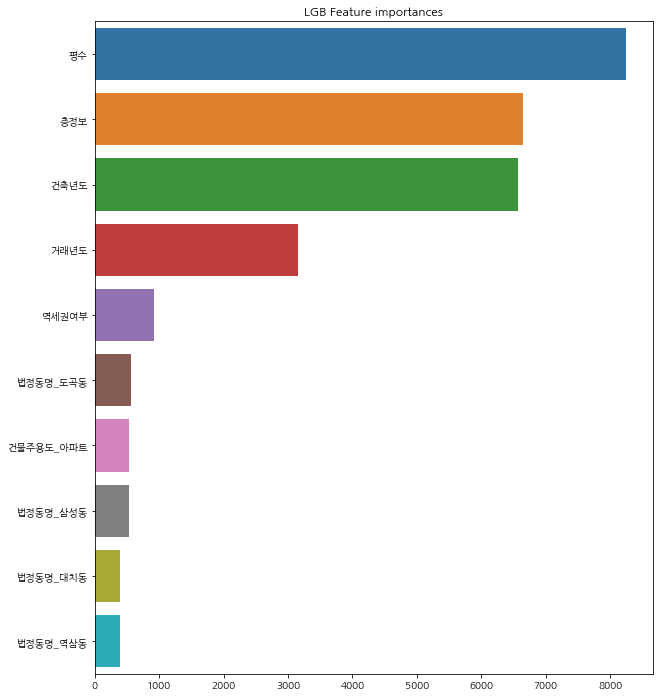

[06:35:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


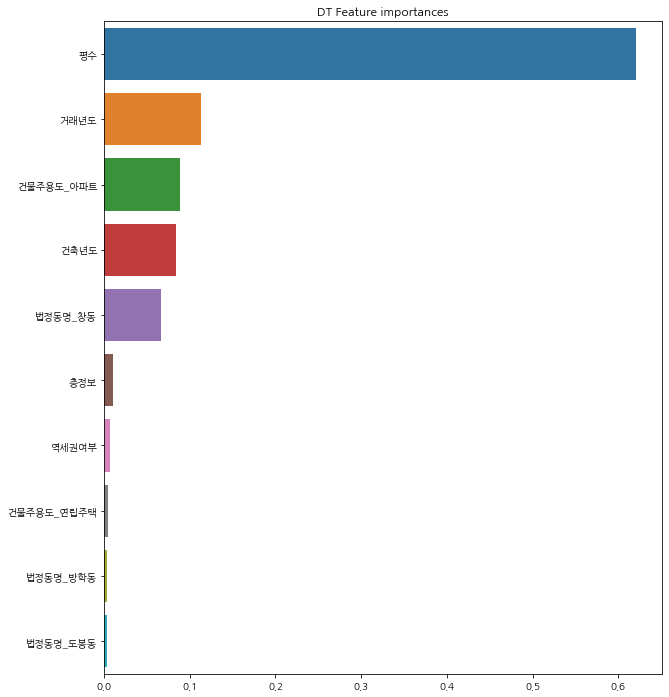

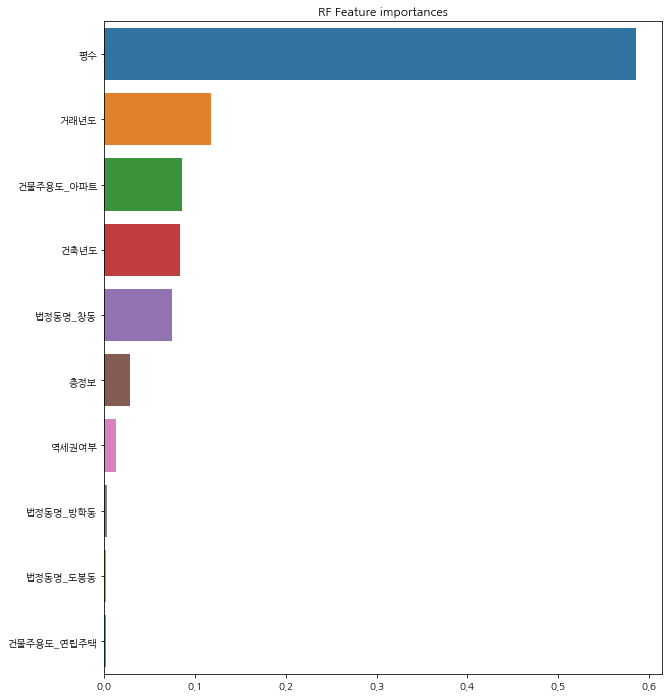

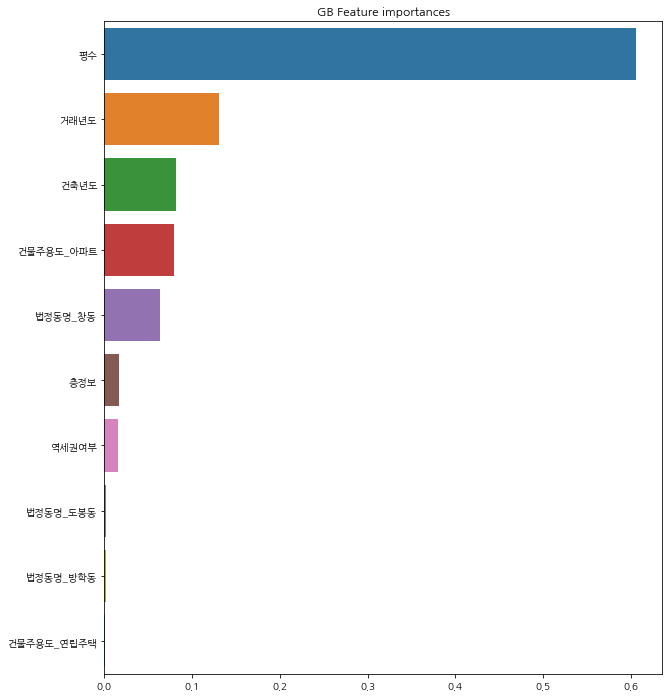

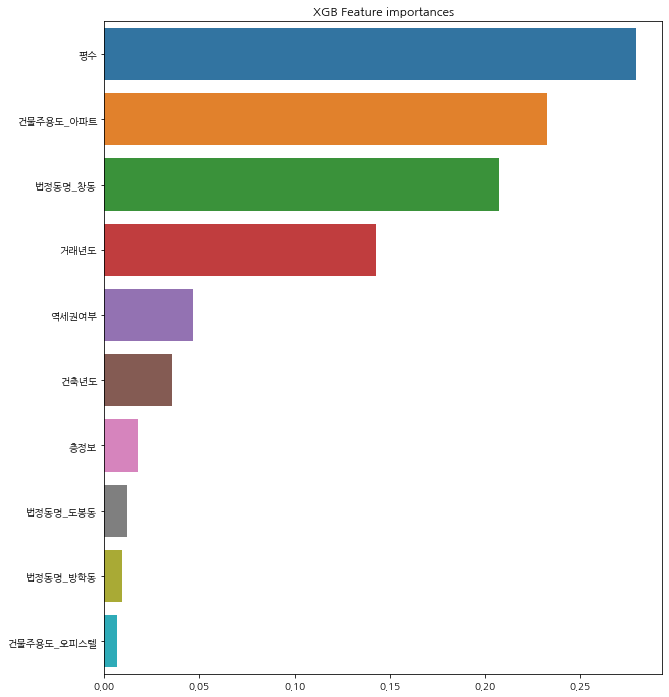

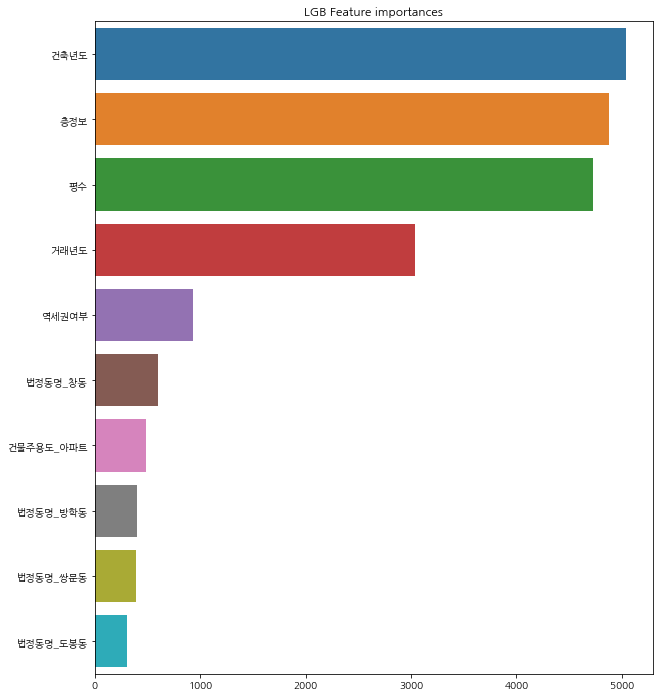

[06:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


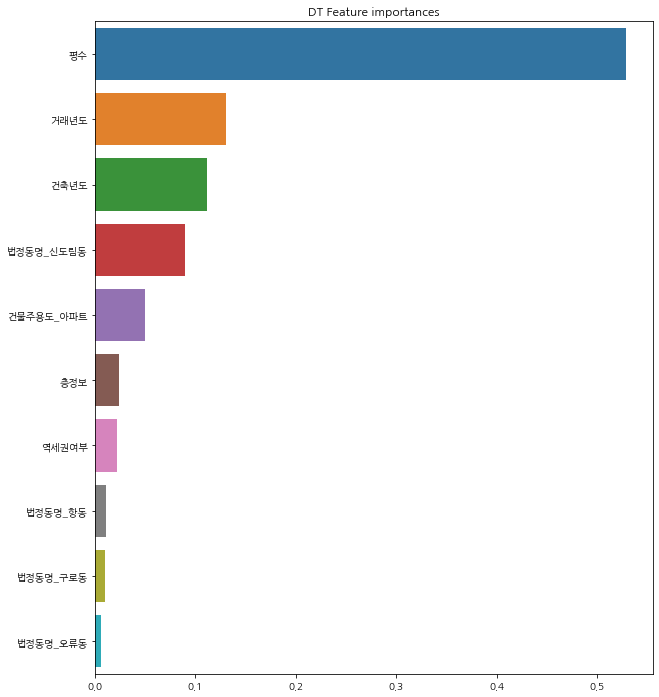

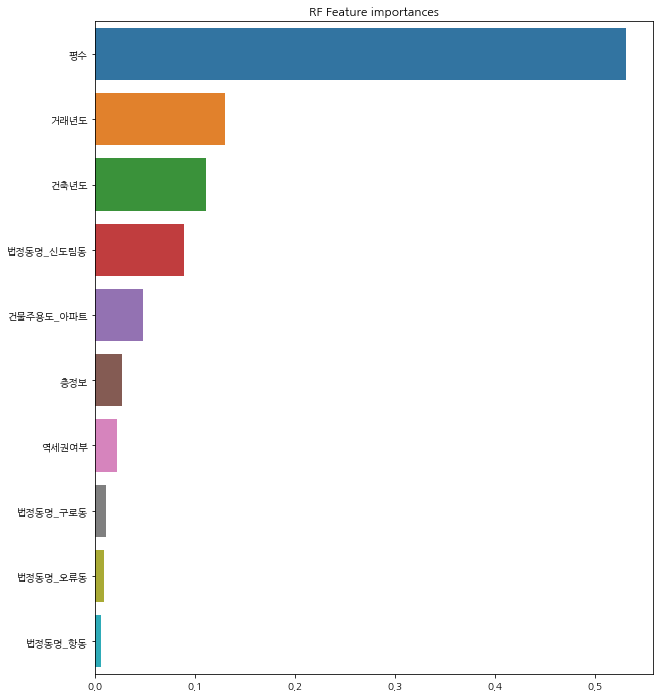

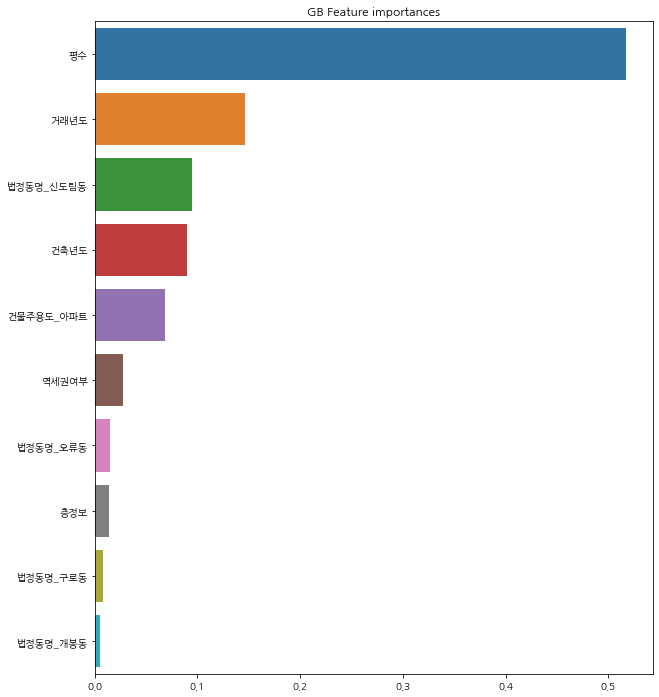

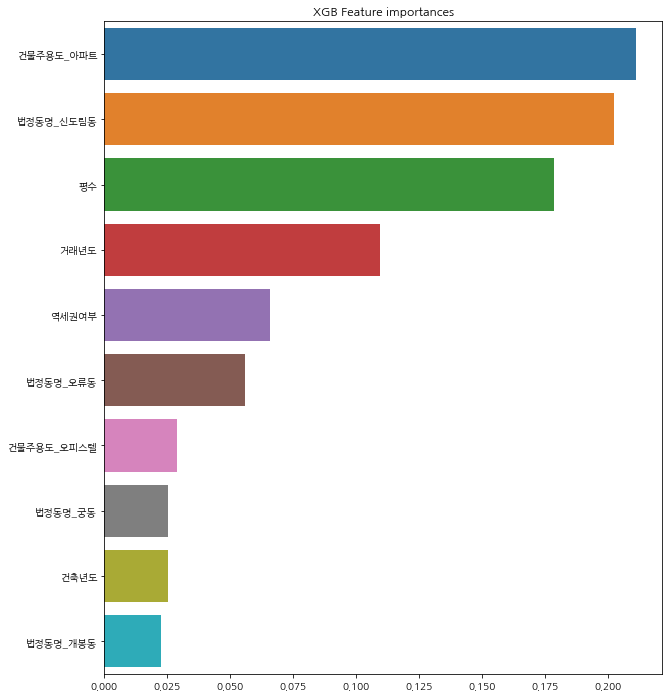

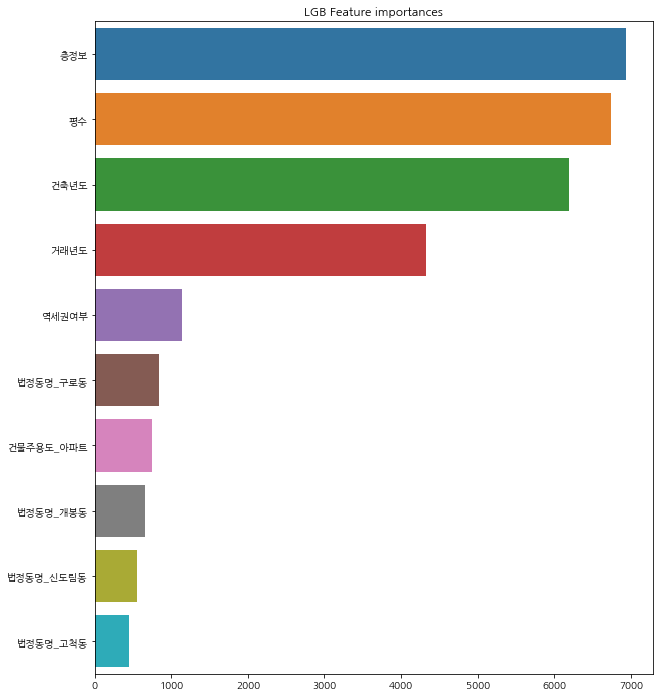

[06:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


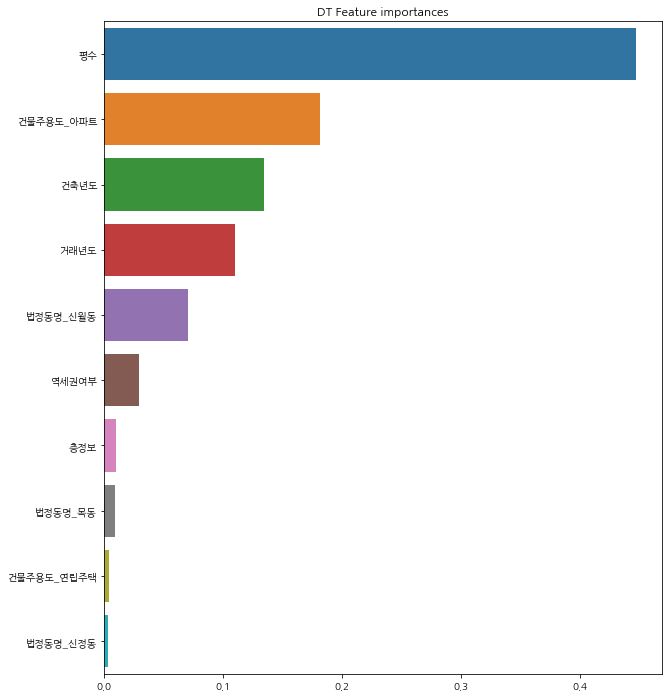

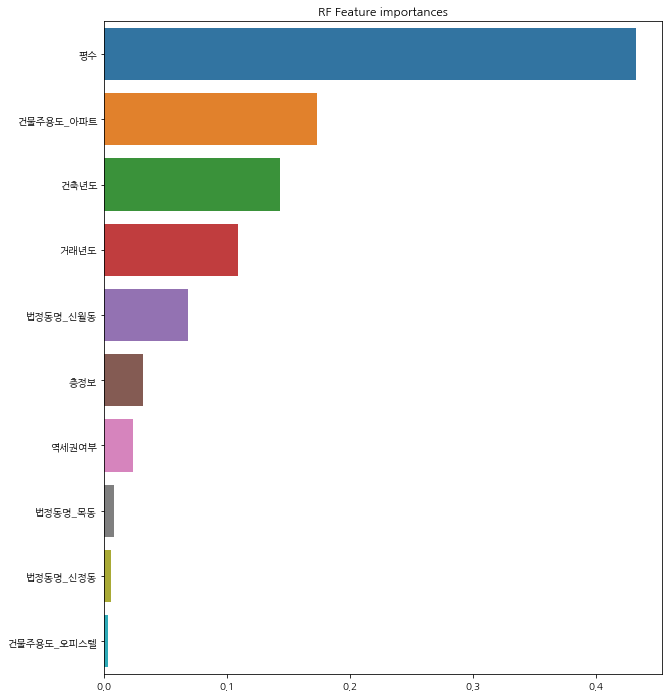

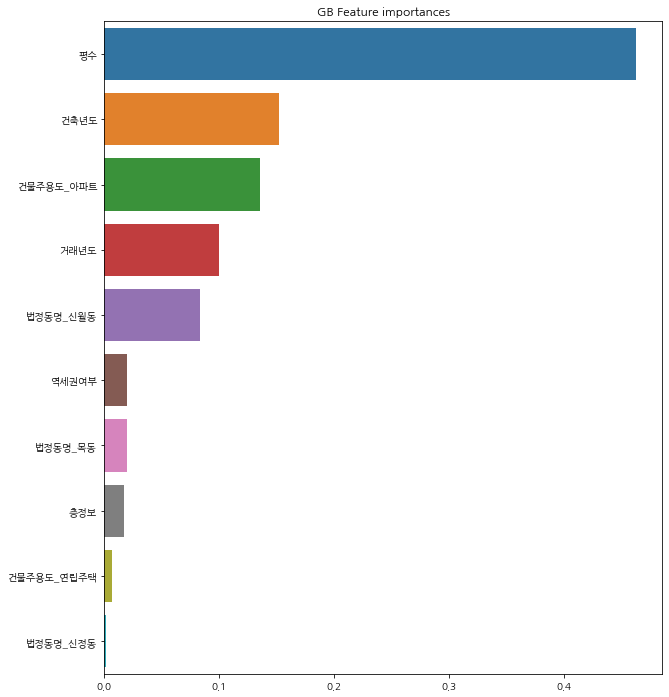

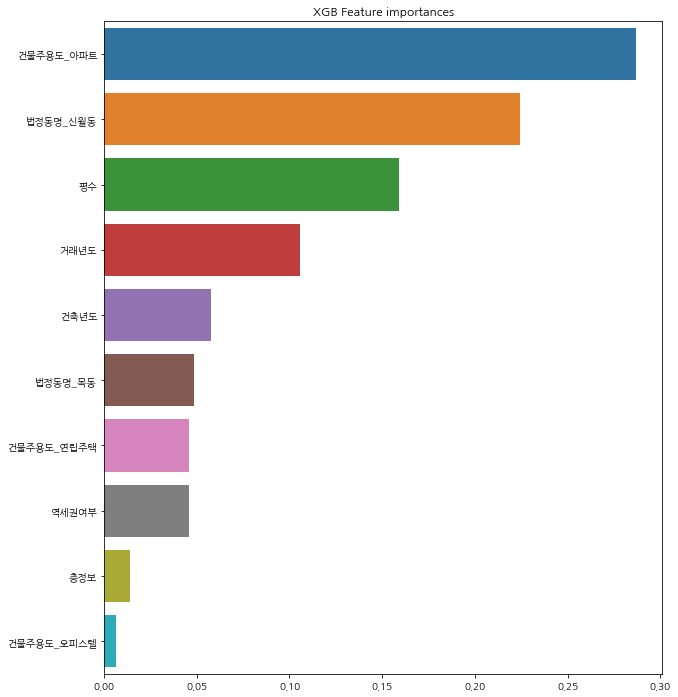

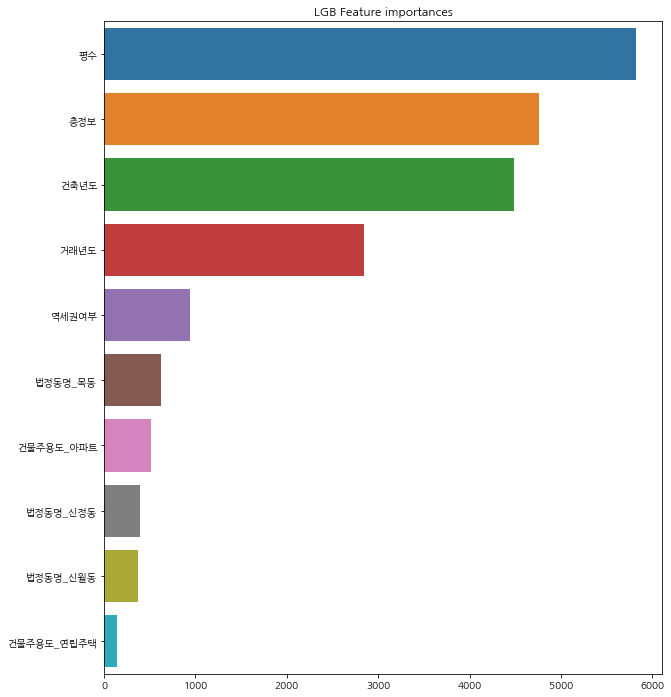

In [ ]:
for i, j in zip( lst, lst2 ) :
    Importance( i, j )